## 1. Importing important Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2.Importing data

In [2]:
data1 = pd.read_csv('Fraud_check.csv',sep=',')
data1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## 3. Understanding data

In [3]:
data1.shape

(600, 6)

In [4]:
data1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
data1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

## 4. Data Preparation

In [6]:
y = []
for itr in data1['Taxable.Income']:
    if itr <= 30000:
        y.append('Risky')
    else:
        y.append('Good')
data1['y'] = y

In [7]:
data1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,y
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [8]:
data1.y.unique()

array(['Good', 'Risky'], dtype=object)

In [9]:
data1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
y                  0
dtype: int64

In [10]:
data1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
y                  object
dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
data1['Encoded y'] = le.fit_transform(data1['y'])

In [13]:
data1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,y,Encoded y
0,NO,Single,68833,50047,10,YES,Good,0
1,YES,Divorced,33700,134075,18,YES,Good,0
2,NO,Married,36925,160205,30,YES,Good,0
3,YES,Single,50190,193264,15,YES,Good,0
4,NO,Married,81002,27533,28,NO,Good,0


In [14]:
data1.drop(labels=['Taxable.Income','y'],axis=1,inplace=True)

In [15]:
data1['Undergrad'] = le.fit_transform(data1['Undergrad'])
data1['Marital.Status'] = le.fit_transform(data1['Marital.Status'])
data1['Urban'] = le.fit_transform(data1['Urban'])

In [16]:
data1.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Encoded y
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [17]:
data1['Encoded y'].unique()

array([0, 1])

In [18]:
data1['Undergrad'].unique()

array([0, 1])

In [19]:
data1['Marital.Status'].unique()

array([2, 0, 1])

In [20]:
data1['Urban'].unique()

array([1, 0])

## 5. Model Building

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = data1.drop('Encoded y',axis= 1)
Y = data1[['Encoded y']]

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20,random_state = 12)

In [24]:
print(X_train.shape,Y_train.shape)

(480, 5) (480, 1)


In [25]:
print(X_test.shape,Y_test.shape)

(120, 5) (120, 1)


## 6. Model Training

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_split=2)

In [28]:
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

## 7. Model Testing

In [29]:
y_pred_train = dt_model.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
y_pred_test = dt_model.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
from sklearn.tree import plot_tree

[Text(194.65116279069767, 206.56799999999998, 'X[3] <= 24.5\nentropy = 0.78\nsamples = 480\nvalue = [369, 111]'),
 Text(132.36279069767443, 184.824, 'X[2] <= 183724.5\nentropy = 0.821\nsamples = 371\nvalue = [276, 95]'),
 Text(77.86046511627907, 163.07999999999998, 'X[2] <= 177829.0\nentropy = 0.801\nsamples = 345\nvalue = [261, 84]'),
 Text(70.07441860465116, 141.336, 'X[3] <= 13.5\nentropy = 0.816\nsamples = 332\nvalue = [248, 84]'),
 Text(38.93023255813954, 119.592, 'X[2] <= 26849.0\nentropy = 0.748\nsamples = 192\nvalue = [151, 41]'),
 Text(31.144186046511628, 97.848, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(46.71627906976744, 97.848, 'X[2] <= 176958.0\nentropy = 0.74\nsamples = 191\nvalue = [151, 40]'),
 Text(38.93023255813954, 76.10399999999998, 'X[2] <= 163624.0\nentropy = 0.732\nsamples = 190\nvalue = [151, 39]'),
 Text(31.144186046511628, 54.360000000000014, 'X[2] <= 157360.0\nentropy = 0.754\nsamples = 180\nvalue = [141, 39]'),
 Text(15.572093023255814, 32.6159999

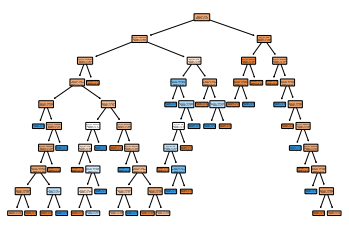

In [32]:
plot_tree(dt_model,rounded=True,filled=True)

## 8. Model Evaluation

In [33]:
from sklearn.metrics import accuracy_score as ac

In [34]:
ac(Y_train,y_pred_train)

0.8333333333333334

In [35]:
ac(Y_test,y_pred_test)

0.8166666666666667

## Note:

* When I used max_depth as 'None',there was overfitting problem as the training accuracy was higher but the testing accuracy was very low
* To overcome this problem,i used prunning so that training accuracy can be almost similar to testing accuracy

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [37]:
confusion_matrix(Y_train,y_pred_train)

array([[367,   2],
       [ 78,  33]], dtype=int64)

In [38]:
confusion_matrix(Y_test,y_pred_test)

array([[98,  9],
       [13,  0]], dtype=int64)

In [39]:
print(classification_report(Y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       369
           1       0.94      0.30      0.45       111

    accuracy                           0.83       480
   macro avg       0.88      0.65      0.68       480
weighted avg       0.85      0.83      0.80       480

